<a href="https://colab.research.google.com/github/LuvMutreja/Cardiovascular-Risk-Prediction/blob/main/Classification_Capstone_Project_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual - Luv Mutreja


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients' information. It includes
over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both
demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1868]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['figure.figsize'] = (10,6)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif,SelectKBest
from scipy.stats import ttest_1samp, pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import graphviz
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [1869]:
# Loading the Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1870]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1871]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Alma Better/Module 4 Machine Learning/#Capstone Projects/Classification Capstone Project- Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')
    # 'G:\My Drive\Alma Better\Module 4 Machine Learning\#Capstone Projects\Classification Capstone Project- Cardiovascular Risk Prediction\data_cardiovascular_risk.csv')

### Dataset First View

In [1872]:
# Dataset First Look
dataset.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [1873]:
# Dataset Rows & Columns count
dataset.shape

(3390, 17)

### Dataset Information

In [1874]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [1875]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [1876]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [1877]:
# printing the total null values in the dataset
print('Total null values present in this dataset are :',dataset.isnull().sum().sum())

Total null values present in this dataset are : 510


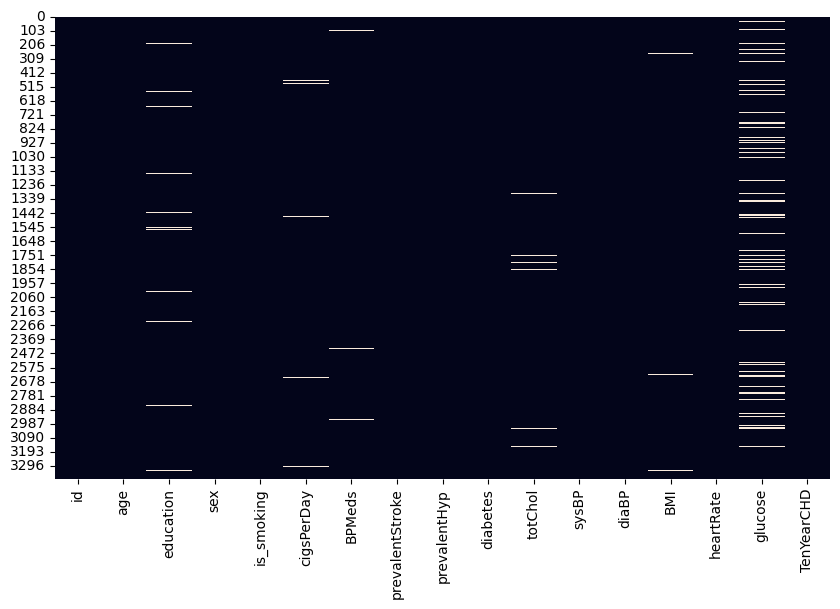

In [1878]:
# visualizing Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The aim is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset contains ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'] i.e 17 columns for 3390 rows. Few columns have null values but glucose column has the highest null values i.e 304. Total null values in this dataset are 510.

## ***2. Understanding Your Variables***

In [1879]:
# Dataset Columns
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [1880]:
# Dataset Describe
dataset.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

<b>Unique Identifier:</b>
*  ID: Id of the person 

<b>Demographic:</b>
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

<b>Education:</b>
* Education: Educational qualification of the person.(Discrete)

<b>Behavioral:</b>
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(Discrete)

<b>Medical( history):</b>
*   BP Meds: whether or not the patient was on blood pressure medication (binary: “1”, means “Yes”, “0” means “No”)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (binary: “1”, means “Yes”, “0” means “No”)
*   Prevalent Hyp: whether or not the patient was hypertensive i.e has high BP problem.(binary: “1”, means “Yes”, “0” means “No”)
*   Diabetes: whether or not the patient had diabetes (binary: “1”, means “Yes”, “0” means “No”)

<b>Medical( current):</b>
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous)
*   Glucose: glucose level (Continuous)

<b>Predict or target variable:</b>
*   10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
Dependent Variable

### Check Unique Values for each variable.

In [1881]:
# Checking Unique Values for each variable.
for col in dataset.columns:
  print('Number of unique values in ',col,' is ',dataset[col].nunique())

Number of unique values in  id  is  3390
Number of unique values in  age  is  39
Number of unique values in  education  is  4
Number of unique values in  sex  is  2
Number of unique values in  is_smoking  is  2
Number of unique values in  cigsPerDay  is  32
Number of unique values in  BPMeds  is  2
Number of unique values in  prevalentStroke  is  2
Number of unique values in  prevalentHyp  is  2
Number of unique values in  diabetes  is  2
Number of unique values in  totChol  is  240
Number of unique values in  sysBP  is  226
Number of unique values in  diaBP  is  142
Number of unique values in  BMI  is  1259
Number of unique values in  heartRate  is  68
Number of unique values in  glucose  is  132
Number of unique values in  TenYearCHD  is  2


## 3. ***Handling Missing Values***

In [1882]:
# Missing Value Count Function
def show_missing():
    missing=dataset.columns[dataset.isnull().any()].tolist()
    return missing

In [1883]:
# Missing data counts and percentage
print('Missing Data Count')
print(dataset[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(dataset[show_missing()].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [1884]:
dataset['null']=np.where((dataset['glucose'].isnull())|(dataset['education'].isnull())|(dataset['BPMeds'].isnull())|(dataset['totChol'].isnull())|(dataset['cigsPerDay'].isnull())|(dataset['BMI'].isnull())|(dataset['heartRate'].isnull()),1,0)

In [1885]:
dataset[(dataset['glucose'].isnull())|(dataset['education'].isnull())|(dataset['BPMeds'].isnull())|(dataset['totChol'].isnull())|(dataset['cigsPerDay'].isnull())|(dataset['BMI'].isnull())|(dataset['heartRate'].isnull())][['null','TenYearCHD']].sort_values(by='null')

null  TenYearCHD
0        1           1
2273     1           0
2254     1           1
2246     1           1
2244     1           0
...    ...         ...
1151     1           1
1148     1           0
1138     1           0
1105     1           0
3388     1           0

[463 rows x 2 columns]

In [1886]:
dataset[(dataset['null']==1)&(dataset['TenYearCHD']==0)]

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
8        8   41        2.0   F        YES        20.0     NaN   
9        9   55        2.0   F         NO         0.0     0.0   
10      10   61        1.0   F         NO         0.0     0.0   
36      36   46        3.0   F         NO         0.0     0.0   
38      38   41        2.0   F        YES         9.0     1.0   
...    ...  ...        ...  ..        ...         ...     ...   
3331  3331   40        NaN   M        YES        20.0     0.0   
3370  3370   46        1.0   F        YES        30.0     0.0   
3378  3378   39        3.0   F        YES         NaN     0.0   
3379  3379   39        1.0   M        YES        30.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
8                   0             0         0    220.0  126.0   78.0  20.70   
9                   0             1         0    326.0  144.0   81.0  25.71   
10                  0             1         0      NaN  185.0  121.0  35.22   
36                  0             0         0    193.0  106.5   70.5  26.18   
38                  1             1         0    180.0  114.0   70.0  22.41   
...               ...           ...       ...      ...    ...    ...    ...   
3331                0             0         0    266.0  101.0   73.0    NaN   
3370                0             0         0    219.0  107.0   69.0  21.40   
3378                0             0         0    197.0  126.5   76.5  19.71   
3379                0             0         0    292.0  120.0   85.0  31.09   
3388                0             1         0    191.0  167.0  105.0  23.01   

      heartRate  glucose  TenYearCHD  null  
8          86.0     79.0           0     1  
9          85.0      NaN           0     1  
10         80.0      NaN           0     1  
36         75.0      NaN           0     1  
38         92.0      NaN           0     1  
...         ...      ...         ...   ...  
3331       70.0     64.0           0     1  
3370       66.0      NaN           0     1  
3378       55.0     63.0           0     1  
3379       85.0      NaN           0     1  
3388       80.0     85.0           0     1  

[396 rows x 18 columns]

In [1887]:
dataset.drop(dataset[(dataset['null']==1)&(dataset['TenYearCHD']==0)].index,inplace=True)

In [1888]:
print('Missing Data Count')
print(dataset[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(dataset[show_missing()].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
glucose       39
education     13
BPMeds         7
totChol        7
BMI            7
cigsPerDay     1
heartRate      1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       1.30
education     0.43
BPMeds        0.23
totChol       0.23
BMI           0.23
cigsPerDay    0.03
heartRate     0.03
dtype: float64


In [1889]:
len(dataset[(dataset['is_smoking']=='NO')&(dataset['cigsPerDay'].isnull())])

0

In [1890]:
#  
len(dataset[(dataset['is_smoking']=='YES')&(dataset['cigsPerDay'].isnull())])

1

In [1891]:
int(round(dataset[dataset['is_smoking']=='YES']['cigsPerDay'].mean(),0))

19

In [1892]:
dataset['cigsPerDay'].fillna(int(round(dataset[dataset['is_smoking']=='YES']['cigsPerDay'].mean(),0)),inplace=True)

In [1893]:
dataset['cigsPerDay'].isnull().sum()

0

In [1894]:
dataset[dataset['BPMeds'].isnull()]

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
1288  1288   45        3.0   M        YES        40.0     NaN   
1367  1367   66        1.0   F         NO         0.0     NaN   
1769  1769   57        4.0   F         NO         0.0     NaN   
1862  1862   65        1.0   F         NO         0.0     NaN   
2644  2644   65        2.0   F         NO         0.0     NaN   
2940  2940   50        4.0   M        YES         9.0     NaN   
3013  3013   55        1.0   F         NO         0.0     NaN   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1288                0             0         0    278.0  135.0   84.0  23.79   
1367                0             1         1    203.0  205.0   83.0  28.27   
1769                0             1         0    328.0  181.0  112.5  27.05   
1862                1             1         0    290.0  144.0   64.0  21.41   
2644                0             1         0    270.0  165.0   98.0  21.66   
2940                0             0         0    296.0  119.0   90.0  23.55   
3013                0             1         0    325.0  155.0   90.0  26.27   

      heartRate  glucose  TenYearCHD  null  
1288       75.0     79.0           1     1  
1367       75.0    118.0           1     1  
1769       85.0     94.0           1     1  
1862       58.0    145.0           1     1  
2644       62.0     92.0           1     1  
2940       75.0     69.0           1     1  
3013       68.0     72.0           1     1

In [1895]:
pd.DataFrame(dataset.groupby('TenYearCHD')['BPMeds'].value_counts())

BPMeds
TenYearCHD BPMeds        
0          0.0       2425
           1.0         58
1          0.0        471
           1.0         33

In [1896]:
BPmeds_dict1= {1288:0,1367:1,1769:0,1862:1,2644:0,2940:0,3013:0}
dataset['BPMeds'].fillna(dataset['id'].map(BPmeds_dict1),inplace=True)

In [1897]:
for col in dataset.columns[dataset.isnull().any()].tolist():
    print(col,':',dataset[col].isnull().sum())

education : 13
totChol : 7
BMI : 7
heartRate : 1
glucose : 39


In [1898]:
dataset['education'].median()

2.0

In [1899]:
dataset['education'].fillna(dataset['education'].median(),inplace=True)

In [1900]:
for col in dataset.columns[dataset.isnull().any()].tolist():
    print(col,':',dataset[col].isnull().sum())

totChol : 7
BMI : 7
heartRate : 1
glucose : 39


In [1901]:
dataset[dataset.columns[dataset.isnull().any()].tolist()].nunique()

totChol       233
BMI          1205
heartRate      67
glucose       130
dtype: int64

In [1902]:
for col in dataset.columns[dataset.isnull().any()].tolist():
    dataset[col].fillna(dataset[col].median(),inplace=True)
    print(col,'is now free of null values.')

totChol is now free of null values.
BMI is now free of null values.
heartRate is now free of null values.
glucose is now free of null values.


In [1903]:
dataset.isnull().sum().sum()

0

In [1904]:
dataset.drop('null',axis=1,inplace=True)

In [1905]:
dataset

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3384  3384   61        1.0   F         NO         0.0     0.0   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0  25.38   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3384                0             1         0    217.0  182.0   86.0  26.98   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3384      105.0    113.0           0  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3389       79.0     92.0           0  

[2994 rows x 17 columns]

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

## 4. ***Data Wrangling***

### Data Wrangling Code

In [1906]:
dataset['bmi']=np.where(dataset['BMI']<17.5,'severely underweight',np.where((dataset['BMI']>=17.5)&(dataset['BMI']<=18.4),'underweight',np.where((dataset['BMI']>=18.5)&(dataset['BMI']<=25),'optimal',np.where((dataset['BMI']>=25.1)&(dataset['BMI']<=30),'overweight',np.where((dataset['BMI']>=30.1)&(dataset['BMI']<=40),'obese','severely obese')))))

In [1907]:
dataset[['BMI','bmi']]

BMI         bmi
0     25.38  overweight
1     29.77  overweight
2     20.35     optimal
3     28.26  overweight
4     26.42  overweight
...     ...         ...
3384  26.98  overweight
3385  29.28  overweight
3386  21.96     optimal
3387  28.92  overweight
3389  29.88  overweight

[2994 rows x 2 columns]

In [1908]:
dataset['glucose'].sort_values()

1315     40.0
1783     43.0
1578     44.0
3235     44.0
952      45.0
        ...  
312     348.0
2188    368.0
3042    386.0
1587    394.0
1032    394.0
Name: glucose, Length: 2994, dtype: float64

In [1909]:
categorical= [col for col in dataset.columns[1:] if dataset[col].dtype=='O' and col not in 'TenYearCHD']
print('There are',len(categorical),'categorical features in the dataset i.e:',categorical)

There are 3 categorical features in the dataset i.e: ['sex', 'is_smoking', 'bmi']


In [1910]:
numerical=[col for col in dataset.columns[1:] if dataset[col].dtype!='O' and col not in 'TenYearCHD']
print('There are',len(numerical),'numerical features in the dataset i.e:',numerical)

There are 13 numerical features in the dataset i.e: ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [1911]:
discrete=[col for col in numerical if dataset[col].nunique()<35]
print('There are',len(discrete),'discrete features in the dataset i.e:',discrete)

There are 6 discrete features in the dataset i.e: ['education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [1912]:
continuous= [col for col in numerical if col not in discrete and col not in 'BMI']
print('There are',len(continuous),'continuous features in the dataset i.e:',continuous)

There are 6 continuous features in the dataset i.e: ['age', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose']


In [1913]:
# viewing the target variable
dataset['TenYearCHD'].value_counts()

0    2483
1     511
Name: TenYearCHD, dtype: int64

In [1914]:
# viewing the imbalance in the target variable
len(dataset[dataset['TenYearCHD']==0])/len(dataset[dataset['TenYearCHD']==1])

4.859099804305283

In [1915]:
# viewing the number of people who might have chd in future 
print("Number of people who have a future 10-year risk of coronary heart disease is", len(dataset[dataset['TenYearCHD']==1]))

Number of people who have a future 10-year risk of coronary heart disease is 511


In [1916]:
dataset['is_smoking'].value_counts()

NO     1509
YES    1485
Name: is_smoking, dtype: int64

In [1917]:
pd.DataFrame(dataset.groupby('is_smoking')['TenYearCHD'].value_counts())

TenYearCHD
is_smoking TenYearCHD            
NO         0                 1273
           1                  236
YES        0                 1210
           1                  275

In [1918]:
dataset['sex'].value_counts()

F    1656
M    1338
Name: sex, dtype: int64

In [1919]:
pd.DataFrame(dataset.groupby('sex')['is_smoking'].value_counts())

is_smoking
sex is_smoking            
F   NO                1004
    YES                652
M   YES                833
    NO                 505

In [1920]:
pd.DataFrame(dataset.groupby('sex')['TenYearCHD'].value_counts())

TenYearCHD
sex TenYearCHD            
F   0                 1417
    1                  239
M   0                 1066
    1                  272

In [1921]:
pd.DataFrame(dataset.groupby('prevalentStroke')['TenYearCHD'].value_counts())

TenYearCHD
prevalentStroke TenYearCHD            
0               0                 2472
                1                  501
1               0                   11
                1                   10

In [1922]:
pd.DataFrame(dataset.groupby('prevalentHyp')['TenYearCHD'].value_counts())

TenYearCHD
prevalentHyp TenYearCHD            
0            0                 1785
             1                  256
1            0                  698
             1                  255

In [1923]:
pd.DataFrame(dataset.groupby('diabetes')['TenYearCHD'].value_counts())

TenYearCHD
diabetes TenYearCHD            
0        0                 2433
         1                  478
1        0                   50
         1                   33

In [1924]:
pd.DataFrame(dataset.groupby('BPMeds')[['diabetes','TenYearCHD']].value_counts())

0
BPMeds diabetes TenYearCHD      
0.0    0        0           2377
                1            450
       1        0             48
                1             26
1.0    0        0             56
                1             28
       1        1              7
                0              2

### What all manipulations have you done and insights you found?

Answer Here.

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Class Distribution of the Target Variable(Univariate)

In [1925]:
# Chart - 1 visualization code
px.pie(names=dataset['TenYearCHD'].unique(),values=dataset['TenYearCHD'].value_counts(),template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.RdBu,width=1000,height=410).update_traces(textinfo='percent + value').update_layout(title_text='Class Distribution of the Target Variable i.e 10-year risk of coronary heart disease(1 means Yes, 0 means No)',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2. Sunburst plot displaying data using TenYearCHD, Smoker and Sex columns(Multivariate)

In [1926]:
# Chart - 2 visualization code
px.sunburst(dataset,path=['sex','is_smoking','TenYearCHD'],template='plotly_dark',color_discrete_sequence=px.colors.sequential.Rainbow,width=1000,height=410).update_layout(title_text='Sunburst plot displaying data sorted on TenYearCHD, Smoker and Sex basis',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3.Examining which education group is at most risk(Bivariate)

In [1927]:
# Chart - 3 visualization code
px.histogram(dataset,x='education',color='TenYearCHD',barmode='group',template='plotly_dark',color_discrete_sequence=px.colors.sequential.Blackbody_r,width=1000,height=410).update_layout(title_text='Examining which education group is at most risk through a Countplot',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4. Risk of CHD for each BMI group(Bivariate)

In [1819]:
# Chart - 4 visualization code
px.histogram(dataset,x='bmi',color='TenYearCHD',barmode='group',template='plotly_dark',color_discrete_sequence=px.colors.sequential.Agsunset,width=1000,height=410).update_layout(title_text='Risk of CHD among people falling in different BMI group',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5. Average Cigarettes Smoked by people of different ages and their Risk of CHD(Multivariate)

In [1820]:
# Chart - 5 visualization code
px.histogram(dataset,x='age',y='cigsPerDay',histfunc='avg',color='TenYearCHD',barmode='overlay',facet_col='sex',template='plotly_dark',color_discrete_sequence=px.colors.sequential.Hot_r).update_layout(title_text='Average Cigarettes Smoked by Males and Females of different ages and their Risk of CHD',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [1821]:
# Chart - 6 visualization code
px.box(dataset[['totChol','sysBP','diaBP','BMI','heartRate','glucose']],points='all')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [1822]:
# Chart - 7 visualization code
px.strip(dataset,x='diabetes',y='glucose',color='TenYearCHD',facet_col='prevalentStroke',template='plotly_dark',color_discrete_sequence=px.colors.sequential.Inferno_r).update_layout(title_text='Average Cigarettes Smoked by people of different ages and their Risk of CHD',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [1823]:
# Chart - 8 visualization code
px.parallel_categories(dataset, dimensions=['TenYearCHD','BPMeds', 'prevalentHyp','prevalentStroke','diabetes'],color_continuous_scale=px.colors.sequential.Sunsetdark,template='plotly_dark')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9. Relationship between SysBP and DiaBP

In [1928]:
# Chart - 9 visualization code
px.scatter(dataset.sort_values(by='diaBP'),x='diaBP',y='sysBP',color='cigsPerDay',template='plotly_dark').update_layout(yaxis_title='Systolic Blood Pressure',xaxis_title='Diastolic Blood Pressure',title_text='Scatter plot showing Relationship between SysBP and DiaBP',title_x=0.5)

In [1825]:
dataset[['sysBP','diaBP']].corr()

sysBP     diaBP
sysBP  1.000000  0.780263
diaBP  0.780263  1.000000

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

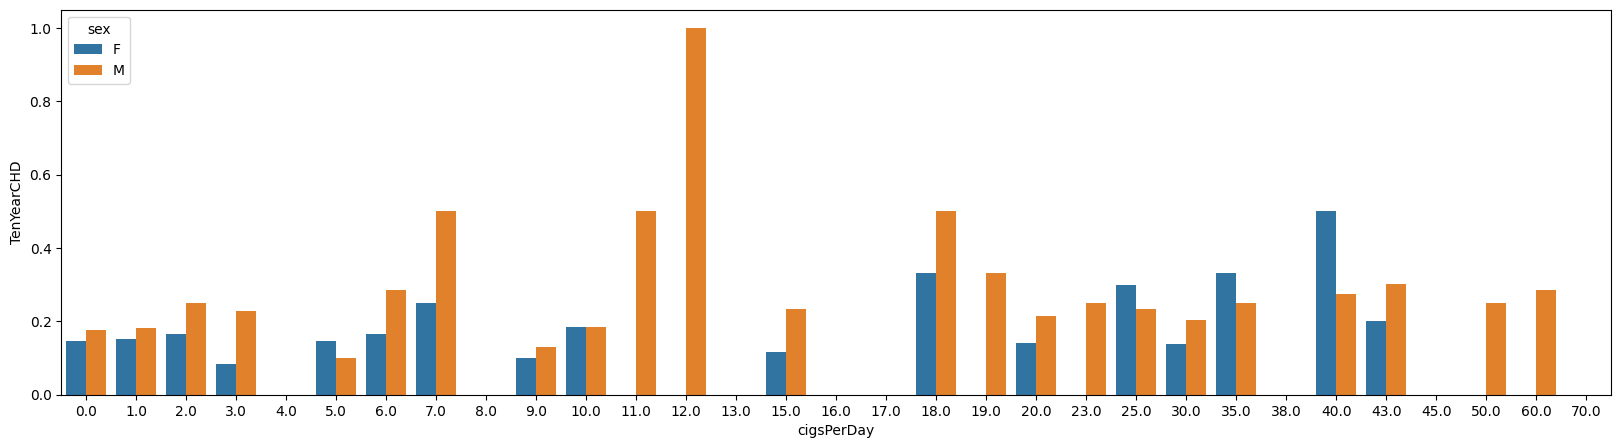

In [1826]:
# Chart - 10 visualization code
plt.figure(figsize=(20,5))
sns.barplot(data=dataset,x='cigsPerDay',y='TenYearCHD',hue='sex',ci=None)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

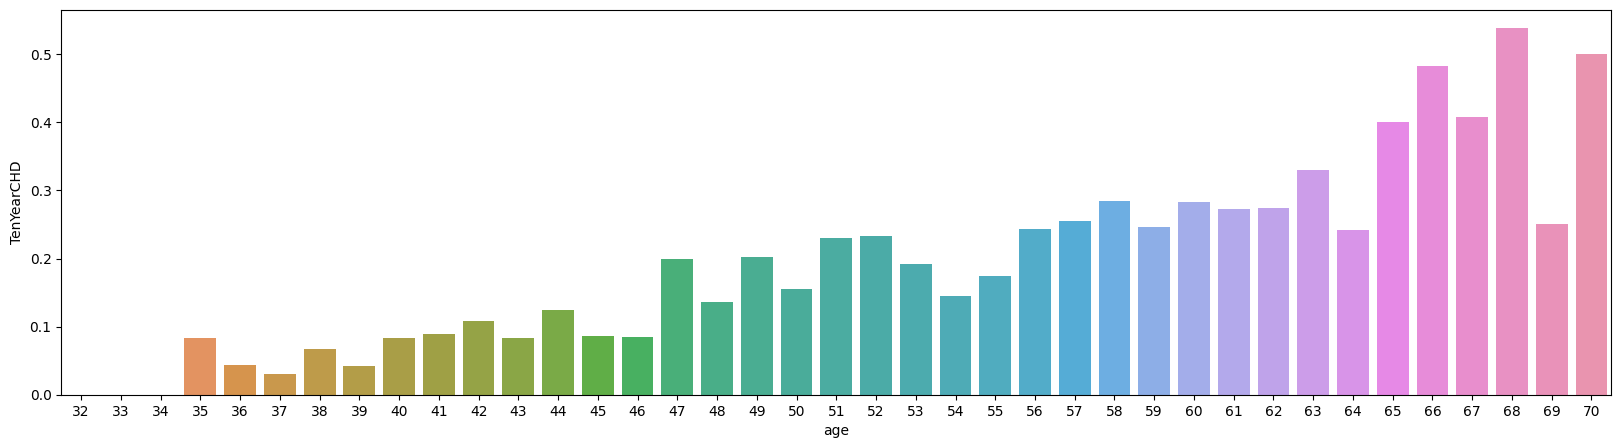

In [1827]:
# Chart - 11 visualization code
plt.figure(figsize=(20,5))
sns.barplot(dataset,x='age',y='TenYearCHD',ci=None)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

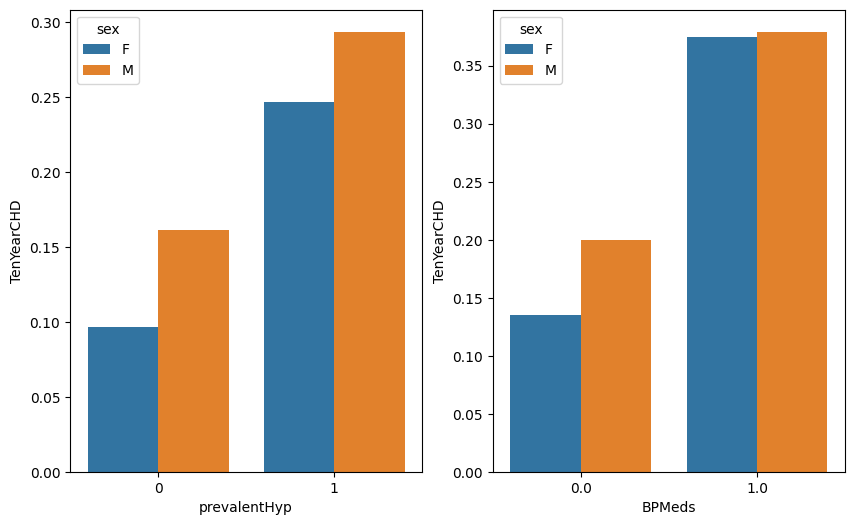

In [1828]:
# Chart - 12 visualization code
plt.subplot(1,2,1)
sns.barplot(dataset,x='prevalentHyp',y='TenYearCHD',hue='sex',ci=None)

plt.subplot(1,2,2)
sns.barplot(dataset,x='BPMeds',y='TenYearCHD',hue='sex',ci=None)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13.Correlation Heatmap

**Correlation Heatmap is attached ahead. The same is not provided here as it is not possible to plot a heatmap without categorical encoding.** 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 14. Decision Tree Visualisation

**Decision Tree Visualisation is attached ahead. The same is not provided here as it is not possible to plot a Decision Tree without passing the data through pre-processing stages.** 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Pair Plot 

In [1829]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [1830]:
dataset[continuous].describe()

age      totChol        sysBP        diaBP    heartRate  \
count  2994.000000  2994.000000  2994.000000  2994.000000  2994.000000   
mean     49.589512   237.154309   132.840681    82.975785    75.922512   
std       8.601053    44.611508    22.441813    12.065225    11.984119   
min      32.000000   107.000000    83.500000    48.000000    45.000000   
25%      42.000000   206.000000   117.125000    74.625000    68.000000   
50%      49.000000   234.000000   129.000000    82.000000    75.000000   
75%      56.000000   264.000000   144.000000    90.000000    83.000000   
max      70.000000   600.000000   295.000000   142.500000   143.000000   

           glucose  
count  2994.000000  
mean     82.023380  
std      24.407379  
min      40.000000  
25%      71.000000  
50%      78.000000  
75%      86.000000  
max     394.000000

In [1831]:
px.box(dataset[continuous])

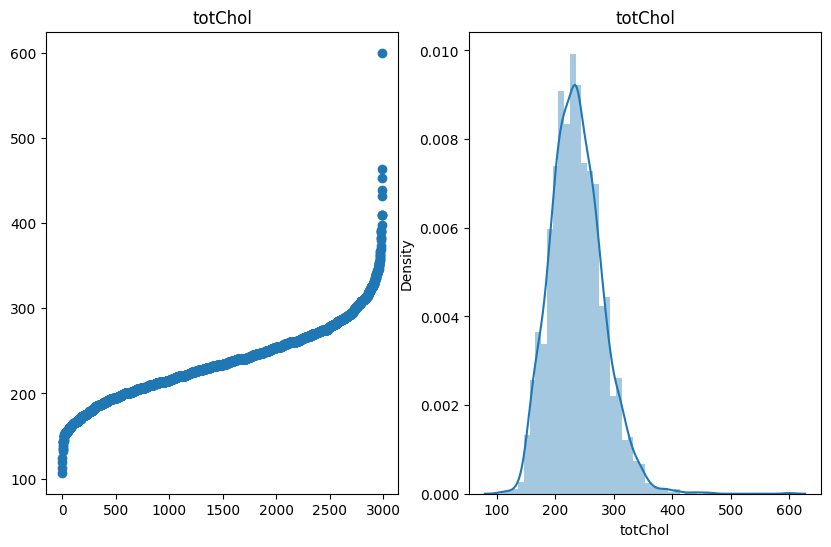

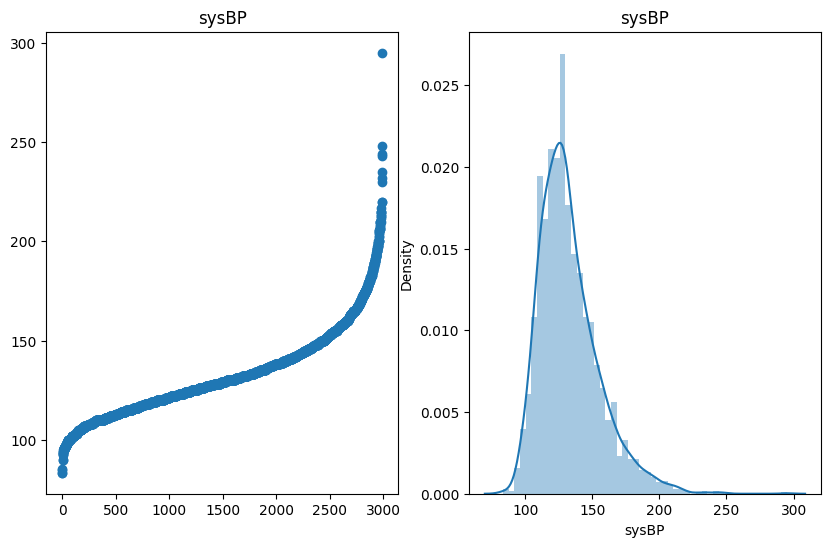

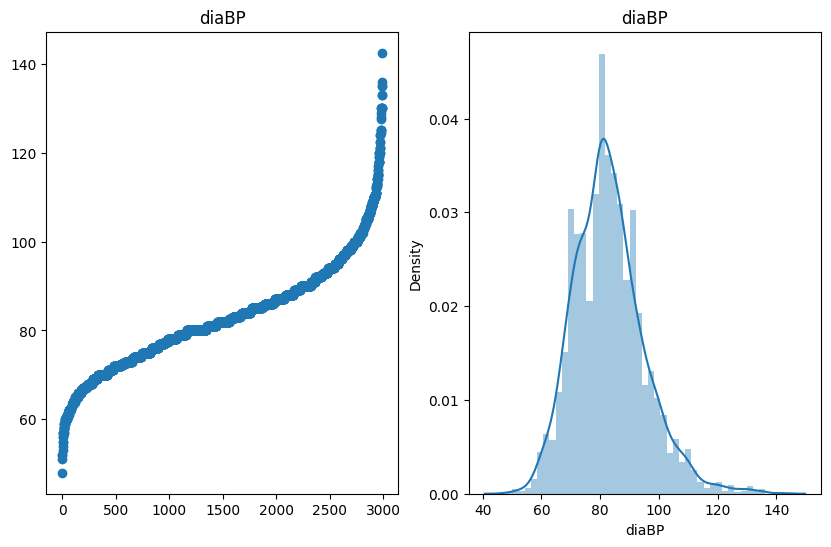

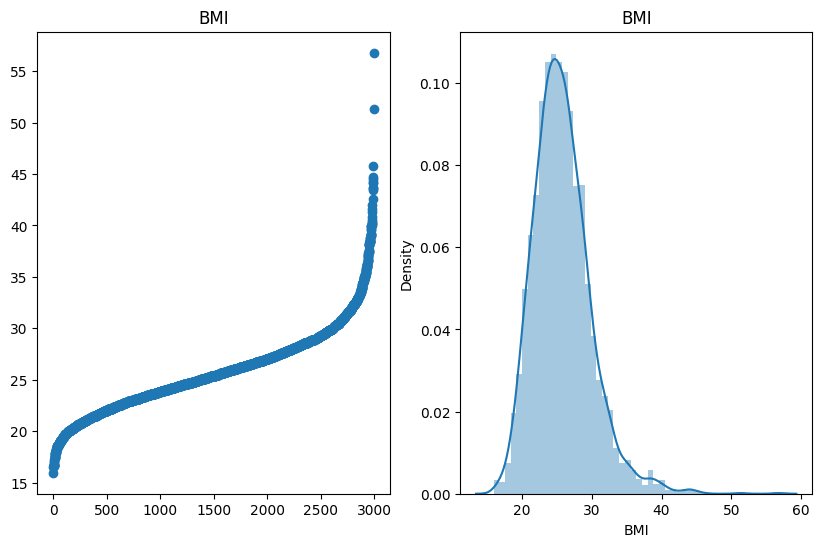

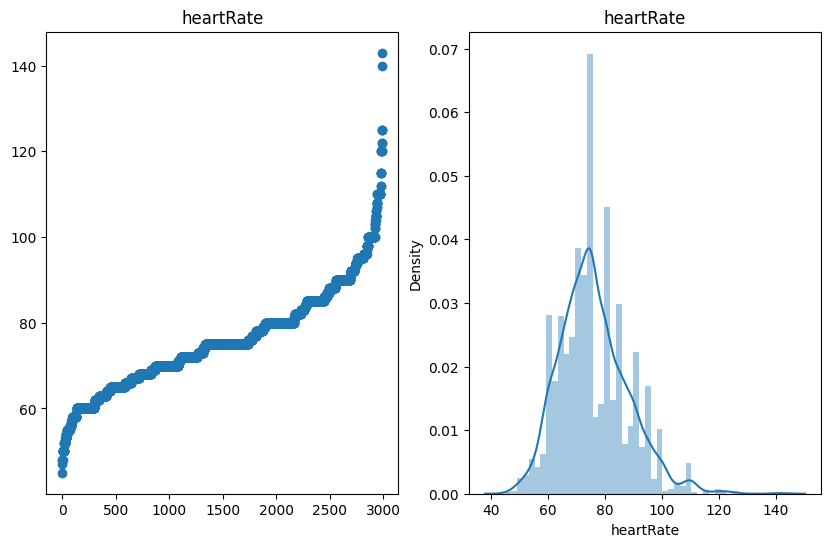

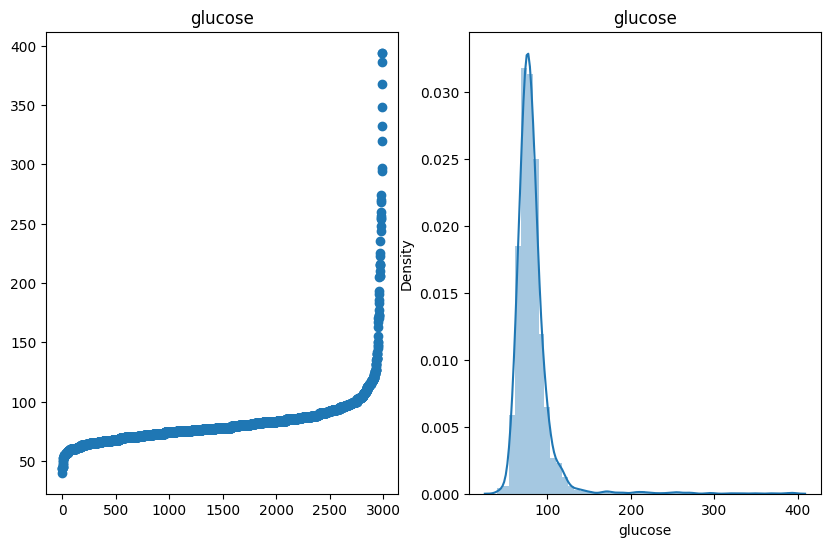

In [1832]:
for col in ['totChol','sysBP','diaBP','BMI','heartRate','glucose']:
    plt.subplot(1,2,1)
    plt.scatter(range(dataset.shape[0]),np.sort(dataset[col].values))
    plt.title(col)
    
    plt.subplot(1,2,2)
    sns.distplot(dataset[col])
    plt.title(col)
    plt.show()    

In [1833]:
outliers=0
outlier_columns=[]
for col in continuous[1:]:
    q1=dataset[col].quantile(0.25)
    q3=dataset[col].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    percentage_outliers= round(((len(dataset[dataset[col]>upper_limit])+len(dataset[dataset[col]<lower_limit]))/len(dataset))*100,2) 
    print(col,'has',len(dataset[dataset[col]>upper_limit]),'values above the upper limit and',len(dataset[dataset[col]<lower_limit]),'values below the lower limit. There are',percentage_outliers,'percent outliers in this feature.')
    outliers=outliers+(len(dataset[dataset[col]>upper_limit])+len(dataset[dataset[col]<lower_limit]))
    column=col+'_outlier'
    outlier_columns.append(column)
    dataset[column]=np.where(dataset[col]>upper_limit,1,np.where(dataset[col]<lower_limit,1,0))
    dataset[col]=np.where(dataset[col]>upper_limit,upper_limit,np.where(dataset[col]<lower_limit,lower_limit,dataset[col]))    
print(outliers)

totChol has 33 values above the upper limit and 2 values below the lower limit. There are 1.17 percent outliers in this feature.
sysBP has 96 values above the upper limit and 0 values below the lower limit. There are 3.21 percent outliers in this feature.
diaBP has 49 values above the upper limit and 2 values below the lower limit. There are 1.7 percent outliers in this feature.
heartRate has 57 values above the upper limit and 1 values below the lower limit. There are 1.94 percent outliers in this feature.
glucose has 155 values above the upper limit and 9 values below the lower limit. There are 5.48 percent outliers in this feature.
404


In [1834]:
dataset['outlier']=np.where((dataset['totChol_outlier']==1)|(dataset['sysBP_outlier']==1)|(dataset['diaBP_outlier']==1)|(dataset['heartRate_outlier']==1)|(dataset['glucose_outlier']==1),1,0)

In [1835]:
dataset[(dataset['totChol_outlier']==1)|(dataset['sysBP_outlier']==1)|(dataset['diaBP_outlier']==1)|(dataset['heartRate_outlier']==1)|(dataset['glucose_outlier']==1)][['TenYearCHD','outlier']].sort_values(by='outlier',ascending=True)

TenYearCHD  outlier
5              1        1
2360           0        1
2329           1        1
2325           0        1
2319           0        1
...          ...      ...
1142           0        1
1134           1        1
1130           0        1
1119           0        1
3387           1        1

[333 rows x 2 columns]

In [1836]:
dataset.drop(columns=outlier_columns,inplace=True)

In [1837]:
dataset[(dataset['outlier']==1)&(dataset['TenYearCHD']==0)]

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
6        6   61        1.0   M         NO         0.0     0.0   
14      14   58        3.0   F         NO         0.0     0.0   
37      37   63        2.0   F         NO         0.0     0.0   
71      71   63        1.0   M         NO         0.0     0.0   
77      77   63        1.0   F         NO         0.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3316  3316   46        2.0   F         NO         0.0     0.0   
3326  3326   42        1.0   M        YES        20.0     0.0   
3365  3365   55        1.0   F         NO         0.0     0.0   
3367  3367   59        3.0   M        YES        20.0     0.0   
3384  3384   61        1.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol     sysBP     diaBP  \
6                   0             1         0    238.0  184.3125  113.0625   
14                  0             1         0    188.0  160.0000  113.0625   
37                  0             1         0    293.0  184.3125   97.0000   
71                  0             1         0    246.0  184.3125  104.0000   
77                  0             1         1    150.0  152.0000   88.0000   
...               ...           ...       ...      ...       ...       ...   
3316                0             0         0    304.0  131.5000   78.5000   
3326                0             0         0    351.0  116.0000   83.0000   
3365                0             0         0    310.0  135.0000   76.5000   
3367                0             1         0    206.0  184.3125   97.0000   
3384                0             1         0    217.0  182.0000   86.0000   

        BMI  heartRate  glucose  TenYearCHD         bmi  outlier  
6     24.83       75.0     79.0           0     optimal        1  
14    35.58       88.0     85.0           0       obese        1  
37    30.47       60.0     96.0           0       obese        1  
71    23.08       80.0     73.0           0     optimal        1  
77    36.54       72.0    108.5           0       obese        1  
...     ...        ...      ...         ...         ...      ...  
3316  21.02       68.0    108.5           0     optimal        1  
3326  21.68       90.0     83.0           0     optimal        1  
3365  26.31      105.5     74.0           0  overweight        1  
3367  26.00      100.0     69.0           0  overweight        1  
3384  26.98      105.0    108.5           0  overweight        1  

[228 rows x 19 columns]

In [1838]:
dataset.drop(dataset[(dataset['outlier']==1)&(dataset['TenYearCHD']==0)].index,inplace=True)

In [1839]:
dataset['TenYearCHD'].value_counts()

0    2255
1     511
Name: TenYearCHD, dtype: int64

In [1840]:
len(dataset)

2766

In [1841]:
dataset[dataset['outlier']==1]

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
5        5   61        3.0   F         NO         0.0     0.0   
15      15   51        1.0   M        YES        15.0     0.0   
81      81   41        4.0   M        YES        40.0     0.0   
151    151   52        3.0   M        YES        20.0     0.0   
173    173   58        1.0   F         NO         0.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3260  3260   43        1.0   F         NO         0.0     0.0   
3296  3296   57        1.0   F        YES        43.0     0.0   
3308  3308   60        1.0   F         NO         0.0     0.0   
3373  3373   58        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol     sysBP     diaBP  \
5                   0             1         0    272.0  182.0000  113.0625   
15                  0             0         0    212.0  146.0000   89.0000   
81                  0             0         0    254.0  141.0000  100.0000   
151                 0             0         0    265.0  106.0000   79.0000   
173                 1             1         1    267.0  157.0000   94.0000   
...               ...           ...       ...      ...       ...       ...   
3260                0             1         1    231.0  155.5000   99.5000   
3296                0             1         0    283.0  184.3125  113.0625   
3308                0             1         0    351.0  184.3125  105.0000   
3373                0             0         1    260.0   85.5000   51.5625   
3387                0             1         0    351.0  164.0000  113.0625   

        BMI  heartRate  glucose  TenYearCHD         bmi  outlier  
5     32.80       85.0     65.0           1       obese        1  
15    24.49      100.0    108.5           1     optimal        1  
81    27.68      105.5     78.0           1  overweight        1  
151   26.48       80.0    108.5           1  overweight        1  
173   33.32       92.0    108.5           1       obese        1  
...     ...        ...      ...         ...         ...      ...  
3260  34.95       68.0    108.5           1       obese        1  
3296  38.61      100.0     83.0           1       obese        1  
3308  36.29       75.0     95.0           1       obese        1  
3373  20.76       87.0    108.5           1     optimal        1  
3387  28.92       73.0     72.0           1  overweight        1  

[105 rows x 19 columns]

In [1842]:
px.box(dataset[continuous])

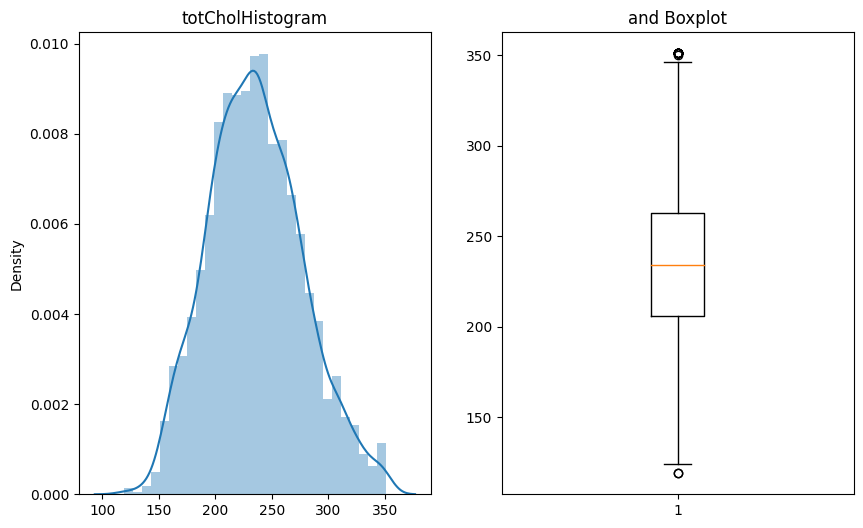

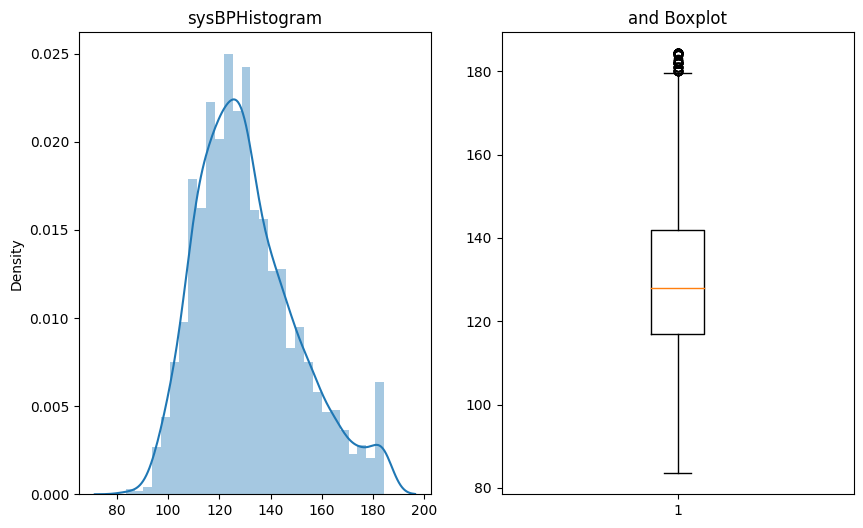

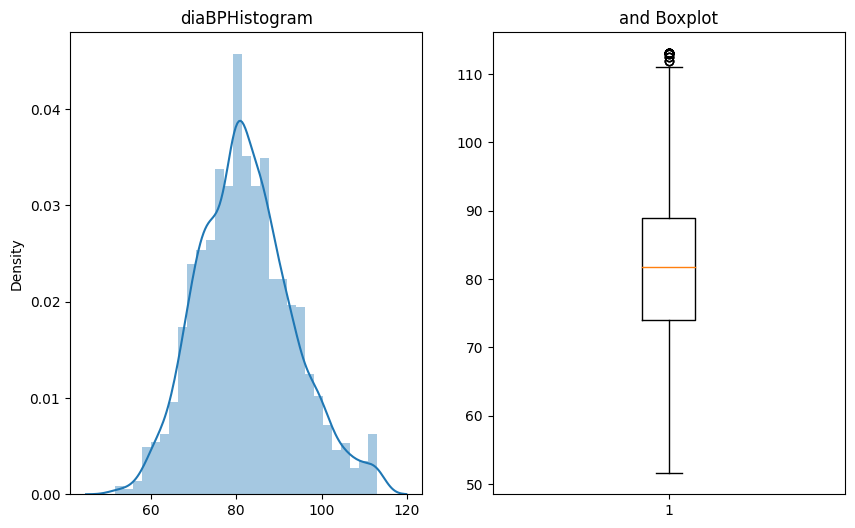

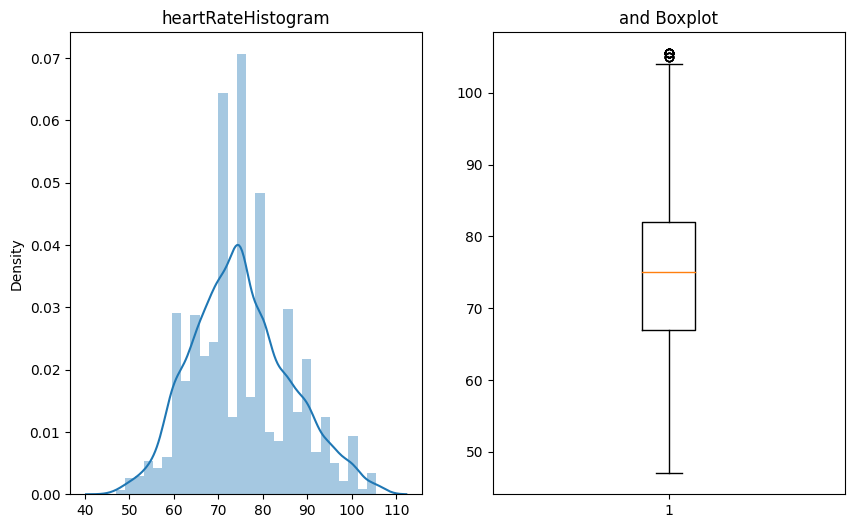

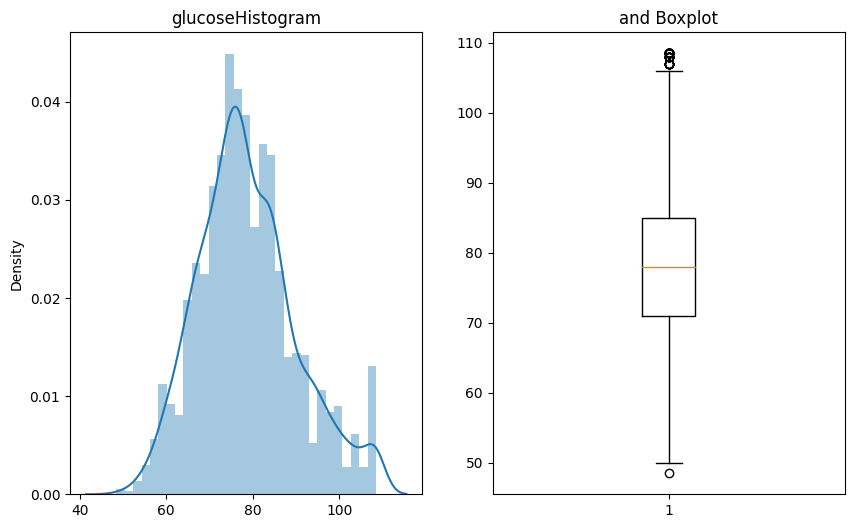

In [1843]:
for col in continuous[1:]:
    plt.subplot(1,2,1)
    sns.distplot(dataset[col])
    label=col+'Histogram'
    plt.title(label)
    plt.xlabel('')

    plt.subplot(1,2,2)
    plt.boxplot(dataset[col])
    plt.title('and Boxplot')
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 2. Categorical Encoding

In [1844]:
# Encode your categorical columns
encoder={'sex':{'M':1,'F':0},'is_smoking':{'YES':1,'NO':0},'bmi':{'severely underweight':0,'severely obese':0,'obese':1,'underweight':2,'overweight':2,'optimal':3}}
dataset=dataset.replace(encoder)

In [1845]:
print(len(dataset.columns)==len(dataset.describe().columns))

True


In [1846]:
dataset

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0    0           1         3.0     0.0   
1        1   36        4.0    1           0         0.0     0.0   
2        2   46        1.0    0           1        10.0     0.0   
3        3   50        1.0    1           1        20.0     0.0   
4        4   64        1.0    0           1        30.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
3383  3383   57        3.0    0           0         0.0     0.0   
3385  3385   60        1.0    0           0         0.0     0.0   
3386  3386   46        1.0    0           0         0.0     0.0   
3387  3387   44        3.0    1           1         3.0     0.0   
3389  3389   54        3.0    0           0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP     diaBP  \
0                   0             0         0    221.0  148.0   85.0000   
1                   0             1         0    212.0  168.0   98.0000   
2                   0             0         0    250.0  116.0   71.0000   
3                   0             1         0    233.0  158.0   88.0000   
4                   0             0         0    241.0  136.5   85.0000   
...               ...           ...       ...      ...    ...       ...   
3383                0             0         0    210.0  131.0   85.0000   
3385                0             0         0    261.0  123.5   79.0000   
3386                0             0         0    199.0  102.0   56.0000   
3387                0             1         0    351.0  164.0  113.0625   
3389                0             0         0    288.0  124.0   77.0000   

        BMI  heartRate  glucose  TenYearCHD  bmi  outlier  
0     25.38       90.0     80.0           1    2        0  
1     29.77       72.0     75.0           0    2        0  
2     20.35       88.0     94.0           0    3        0  
3     28.26       68.0     94.0           1    2        0  
4     26.42       70.0     77.0           0    2        0  
...     ...        ...      ...         ...  ...      ...  
3383  26.59       70.0     77.0           0    2        0  
3385  29.28       70.0    103.0           0    2        0  
3386  21.96       80.0     84.0           0    3        0  
3387  28.92       73.0     72.0           1    2        1  
3389  29.88       79.0     92.0           0    2        0  

[2766 rows x 19 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

###Chart - 13.Correlation Heatmap

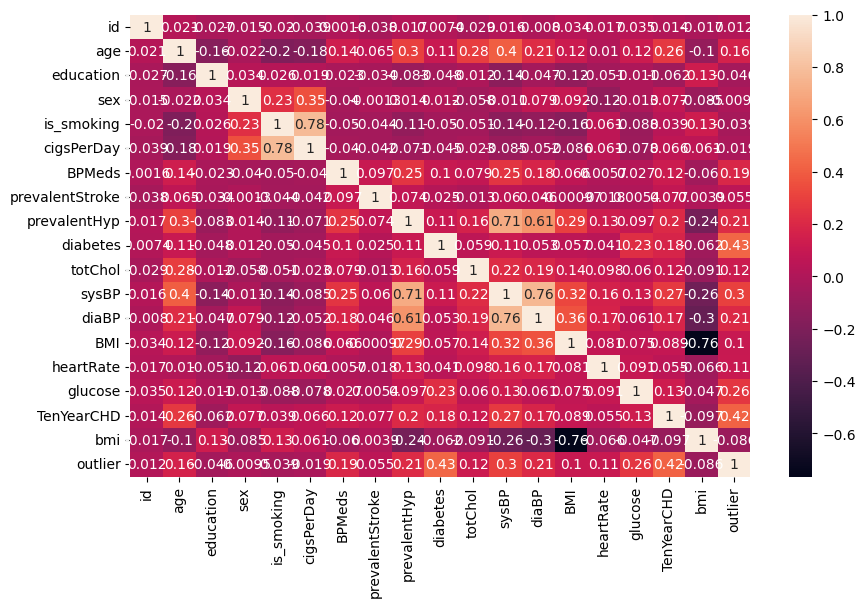

In [1847]:
# Correlation Heatmap visualization code
sns.heatmap(dataset.corr(),annot=True)
plt.show()

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [1848]:
pd.DataFrame(dataset.groupby('is_smoking')['cigsPerDay'].value_counts())

cigsPerDay
is_smoking cigsPerDay            
0          0.0               1391
1          20.0               515
           30.0               151
           15.0               134
           10.0                80
           5.0                 79
           9.0                 78
           3.0                 63
           40.0                56
           1.0                 39
           25.0                39
           43.0                34
           2.0                 15
           35.0                14
           6.0                 11
           7.0                  8
           8.0                  7
           18.0                 7
           60.0                 7
           4.0                  5
           17.0                 5
           23.0                 5
           11.0                 4
           50.0                 4
           12.0                 3
           13.0                 3
           19.0                 3
           16.0                 2
           45.0                 2
           38.0                 1
           70.0                 1

In [1849]:
# Manipulate Features to minimize feature correlation and create new features
dataset.drop(columns=['id','is_smoking','education','outlier','BMI'],inplace=True)

In [1850]:
dataset

age  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0      64    0         3.0     0.0                0             0         0   
1      36    1         0.0     0.0                0             1         0   
2      46    0        10.0     0.0                0             0         0   
3      50    1        20.0     0.0                0             1         0   
4      64    0        30.0     0.0                0             0         0   
...   ...  ...         ...     ...              ...           ...       ...   
3383   57    0         0.0     0.0                0             0         0   
3385   60    0         0.0     0.0                0             0         0   
3386   46    0         0.0     0.0                0             0         0   
3387   44    1         3.0     0.0                0             1         0   
3389   54    0         0.0     0.0                0             0         0   

      totChol  sysBP     diaBP  heartRate  glucose  TenYearCHD  bmi  
0       221.0  148.0   85.0000       90.0     80.0           1    2  
1       212.0  168.0   98.0000       72.0     75.0           0    2  
2       250.0  116.0   71.0000       88.0     94.0           0    3  
3       233.0  158.0   88.0000       68.0     94.0           1    2  
4       241.0  136.5   85.0000       70.0     77.0           0    2  
...       ...    ...       ...        ...      ...         ...  ...  
3383    210.0  131.0   85.0000       70.0     77.0           0    2  
3385    261.0  123.5   79.0000       70.0    103.0           0    2  
3386    199.0  102.0   56.0000       80.0     84.0           0    3  
3387    351.0  164.0  113.0625       73.0     72.0           1    2  
3389    288.0  124.0   77.0000       79.0     92.0           0    2  

[2766 rows x 14 columns]

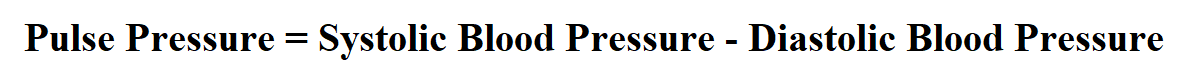

In [1851]:
dataset['Pulse_Pressure']=dataset.apply(lambda x:x['sysBP'] - x['diaBP'],axis=1)

In [1852]:
dataset

age  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0      64    0         3.0     0.0                0             0         0   
1      36    1         0.0     0.0                0             1         0   
2      46    0        10.0     0.0                0             0         0   
3      50    1        20.0     0.0                0             1         0   
4      64    0        30.0     0.0                0             0         0   
...   ...  ...         ...     ...              ...           ...       ...   
3383   57    0         0.0     0.0                0             0         0   
3385   60    0         0.0     0.0                0             0         0   
3386   46    0         0.0     0.0                0             0         0   
3387   44    1         3.0     0.0                0             1         0   
3389   54    0         0.0     0.0                0             0         0   

      totChol  sysBP     diaBP  heartRate  glucose  TenYearCHD  bmi  \
0       221.0  148.0   85.0000       90.0     80.0           1    2   
1       212.0  168.0   98.0000       72.0     75.0           0    2   
2       250.0  116.0   71.0000       88.0     94.0           0    3   
3       233.0  158.0   88.0000       68.0     94.0           1    2   
4       241.0  136.5   85.0000       70.0     77.0           0    2   
...       ...    ...       ...        ...      ...         ...  ...   
3383    210.0  131.0   85.0000       70.0     77.0           0    2   
3385    261.0  123.5   79.0000       70.0    103.0           0    2   
3386    199.0  102.0   56.0000       80.0     84.0           0    3   
3387    351.0  164.0  113.0625       73.0     72.0           1    2   
3389    288.0  124.0   77.0000       79.0     92.0           0    2   

      Pulse_Pressure  
0            63.0000  
1            70.0000  
2            45.0000  
3            70.0000  
4            51.5000  
...              ...  
3383         46.0000  
3385         44.5000  
3386         46.0000  
3387         50.9375  
3389         47.0000  

[2766 rows x 15 columns]

In [1853]:
dataset.drop(columns=['sysBP','diaBP'],inplace=True)

In [1854]:
dataset

age  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0      64    0         3.0     0.0                0             0         0   
1      36    1         0.0     0.0                0             1         0   
2      46    0        10.0     0.0                0             0         0   
3      50    1        20.0     0.0                0             1         0   
4      64    0        30.0     0.0                0             0         0   
...   ...  ...         ...     ...              ...           ...       ...   
3383   57    0         0.0     0.0                0             0         0   
3385   60    0         0.0     0.0                0             0         0   
3386   46    0         0.0     0.0                0             0         0   
3387   44    1         3.0     0.0                0             1         0   
3389   54    0         0.0     0.0                0             0         0   

      totChol  heartRate  glucose  TenYearCHD  bmi  Pulse_Pressure  
0       221.0       90.0     80.0           1    2         63.0000  
1       212.0       72.0     75.0           0    2         70.0000  
2       250.0       88.0     94.0           0    3         45.0000  
3       233.0       68.0     94.0           1    2         70.0000  
4       241.0       70.0     77.0           0    2         51.5000  
...       ...        ...      ...         ...  ...             ...  
3383    210.0       70.0     77.0           0    2         46.0000  
3385    261.0       70.0    103.0           0    2         44.5000  
3386    199.0       80.0     84.0           0    3         46.0000  
3387    351.0       73.0     72.0           1    2         50.9375  
3389    288.0       79.0     92.0           0    2         47.0000  

[2766 rows x 13 columns]

#### 2. Feature Selection

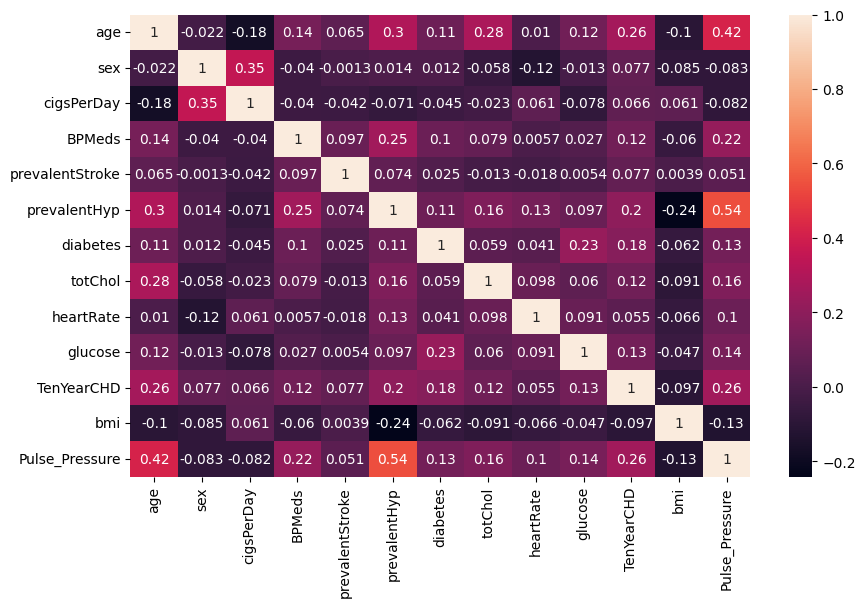

In [1855]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [1856]:
def cal_vif(dataset):
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['vif value']=[variance_inflation_factor(dataset.values,col)for col in range(dataset.shape[1])]
    return vif.sort_values(by='vif value',ascending=False).reset_index(drop=True)

In [1857]:
cal_vif(dataset[[col for col in dataset.columns if col != 'TenYearCHD']])

features  vif value
0               age  41.750491
1           glucose  41.021251
2         heartRate  38.289337
3           totChol  33.337889
4    Pulse_Pressure  23.151714
5               bmi   9.931711
6      prevalentHyp   2.153347
7               sex   2.138106
8        cigsPerDay   1.943762
9            BPMeds   1.128223
10         diabetes   1.069471
11  prevalentStroke   1.024034

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

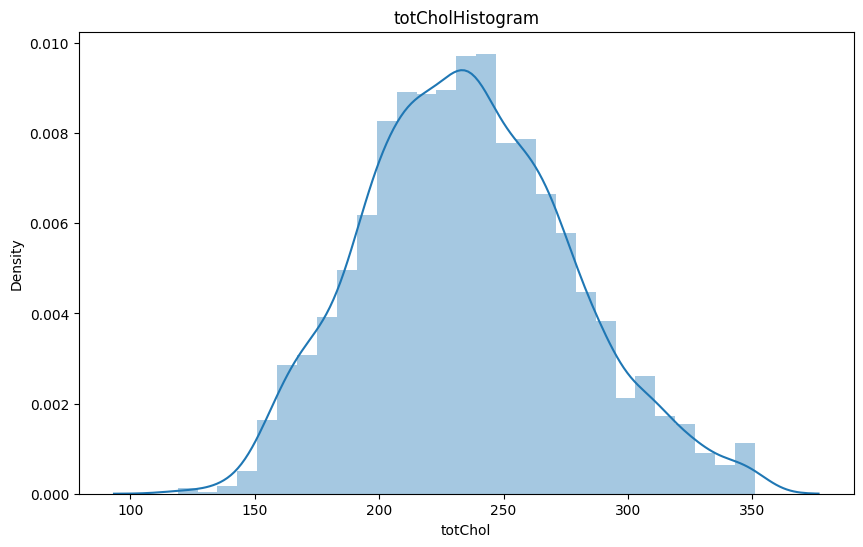

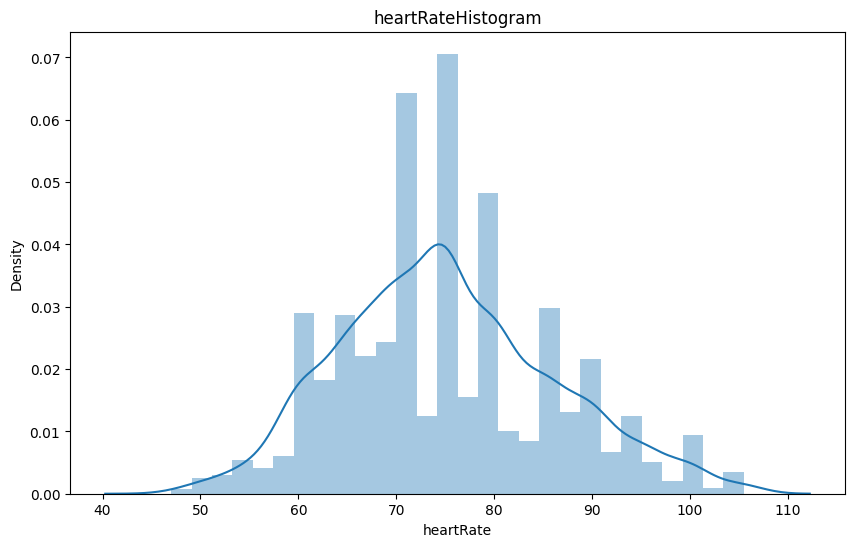

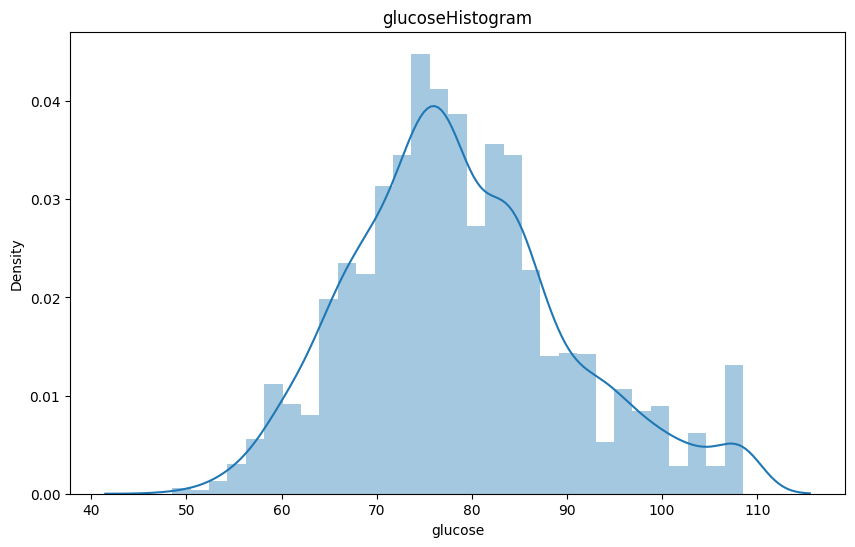

In [1866]:
for col in [col for col in continuous[1:] if col in dataset.columns]:
    sns.distplot(dataset[col])
    label=col+'Histogram'
    plt.title(label)
    plt.show()

### 5. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [1660]:
# Handling Imbalanced Dataset (If needed)
tl=TomekLinks()
x_tl,y_tl=tl.fit_resample(dataset[[col for col in dataset.columns if col not in 'TenYearCHD']],dataset['TenYearCHD'])

In [1661]:
dataset['TenYearCHD'].value_counts()

0    2255
1     511
Name: TenYearCHD, dtype: int64

In [1662]:
y_tl.value_counts()

0    2086
1     511
Name: TenYearCHD, dtype: int64

In [1663]:
rus=RandomUnderSampler(random_state=2510,replacement=False)
x_rus,y_rus=rus.fit_resample(x_tl,y_tl)
y_rus.value_counts()

0    511
1    511
Name: TenYearCHD, dtype: int64

In [1664]:
smote=SMOTE()
x_smote,y_smote= smote.fit_resample(x_tl,y_tl)
y_smote.value_counts()

1    2086
0    2086
Name: TenYearCHD, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

###Chart - 14. Decision Tree Visualisation

In [1665]:
dt=DecisionTreeClassifier()
dt.fit(x_tl,y_tl)

DecisionTreeClassifier()

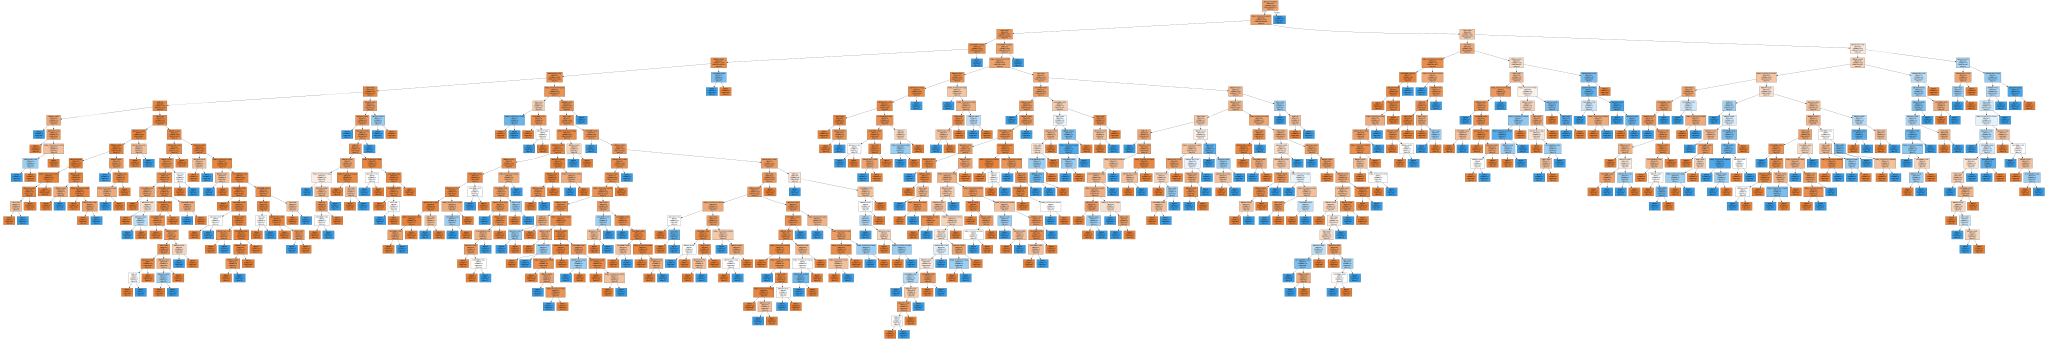

In [1666]:
dt_graph = Source(tree.export_graphviz(dt, out_file=None, feature_names= x_tl.columns, class_names=['0', '1'], filled = True))
display(SVG(dt_graph.pipe(format='svg')))

### 6. Data Scaling

In [1667]:
x_train,x_test,y_train,y_test= train_test_split(x_smote,y_smote,test_size=0.25,random_state=2510)

In [1668]:
y_test.value_counts()

1    526
0    517
Name: TenYearCHD, dtype: int64

In [1669]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [1670]:
# DImensionality Reduction (If needed)
pca=PCA()
pca.fit(x_train)

PCA()

In [1671]:
# x dala unscaled
np.round(pca.explained_variance_ratio_,3) 

array([0.211, 0.111, 0.094, 0.089, 0.083, 0.079, 0.076, 0.069, 0.062,
       0.051, 0.047, 0.029])

PCA Rough

In [1672]:
# pca=PCA(n_components=10)
# x_train=pca.fit_transform(x_train)
# x_test=pca.transform(x_test)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [1673]:
# Split your data to train and test. Choose Splitting ratio wisely.
# x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2510)

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. All the features are equally important.


---


2. Sample mean and population mean are same.


---


3. Independent and dependent variables are not correlated i.e. 
There is no statistically significant relationship between the predictor variable, x, and the response variable, y.

### Hypothetical Statement - 1


---


All the features are equally important 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis => Ho = All the features are equally important

Alternate Hypothesis => Ha = All features are not equally important

#### 2. Perform an appropriate statistical test.

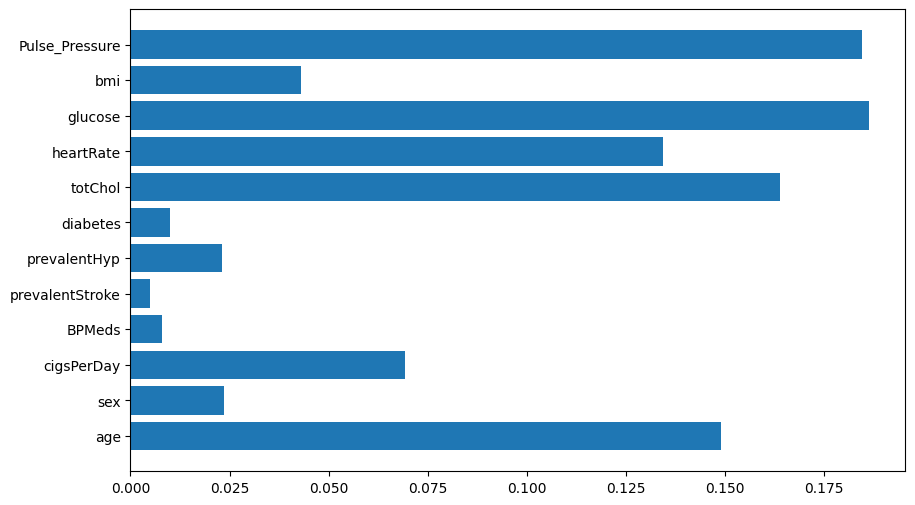

In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(dataset[[col for col in dataset.columns if col != 'TenYearCHD']],dataset['TenYearCHD'])
plt.barh([col for col in dataset.columns if col != 'TenYearCHD'],rf.feature_importances_)
plt.show()

In [1674]:
# Perform Statistical Test to obtain P-Value
x=dataset.drop('TenYearCHD',axis=1)
y=dataset['TenYearCHD']
best_features= SelectKBest(f_classif,k=x.shape[1])
best_features.fit_transform(x,y)
np.round(best_features.pvalues_,4)

array([0.    , 0.0001, 0.0005, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0038, 0.    , 0.    , 0.    ])

##### Which statistical test have you done to obtain P-Value?

F classifier used to get P-values associated with the F-statistic.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2


---


Sample mean and population mean are same

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis=> Ho: Sample mean and population mean are same

Alternate Hypothesis=> Ha : Sample mean and population mean are not same

#### 2. Perform an appropriate statistical test.

In [1675]:
# Perform Statistical Test to obtain P-Value
population= dataset['cigsPerDay']

In [1676]:
# specifying the sample size
sample_size= int(round(len(dataset)/10,0))
sample_size

277

In [1677]:
# taking sample of from the population
sample=np.random.choice(population,sample_size)
sample

array([15.,  0.,  0., 20.,  3.,  0.,  0.,  0., 20., 30., 15.,  0., 20.,
        0.,  0.,  0.,  0.,  0.,  5.,  0.,  0., 20.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 20.,  9., 20.,  0.,  5.,  0.,  0., 20.,  0.,  0.,
        0.,  0., 15.,  0.,  0.,  0.,  0.,  9.,  0., 20.,  0., 20., 40.,
       25.,  0.,  6.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       20.,  0., 40.,  0., 20.,  0.,  0., 15.,  5.,  0.,  0., 20.,  0.,
       20.,  0., 10.,  0., 25.,  0.,  7.,  0.,  0., 18.,  0.,  9.,  0.,
       30.,  0.,  0., 10.,  0., 15.,  9.,  0.,  0.,  0., 15.,  0., 30.,
       30.,  0., 15., 20., 10.,  9.,  6., 15.,  0.,  0., 20.,  0.,  0.,
        0.,  0., 20.,  0., 50., 30.,  0.,  0.,  0., 20.,  0., 20.,  0.,
        0., 43.,  0.,  5., 15.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  1.,
        5., 10.,  9., 20.,  0., 20., 15., 20., 30.,  0.,  0.,  5.,  0.,
        9.,  0.,  0., 40., 20., 20.,  0.,  0., 10.,  0., 35.,  0.,  5.,
        0., 20.,  0.,  1.,  2., 20.,  5.,  0., 20.,  0.,  0.,  7

In [1678]:
# conducting the hypothesis test and printing the result of the test
ttest,p_value = ttest_1samp(sample,population.mean())
print(round(p_value,10))
if p_value>0.05:
  print('We fail to reject null hypothesis')
else:
  print('We reject null hypothesis')

0.0473852594
We reject null hypothesis


In [1679]:
# printing the difference between sample and population mean
print(population.mean()-sample.mean())

1.3751562944574536


##### Which statistical test have you done to obtain P-Value?

I used one sample T Test to obtain the p value

##### Why did you choose the specific statistical test?

Because i wanted to check if popualtion and sample mean are same or not and T test fulfils this purpose.  

### Hypothetical Statement - 3


---

Pulse Pressure and prevalentHyp are not related to each other.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis=> Ho: Pulse Pressure and prevalentHyp are not related to each other.

Alternate Hypothesis=> Ha: Pulse Pressure and prevalentHyp are related to each other.

#### 2. Perform an appropriate statistical test.

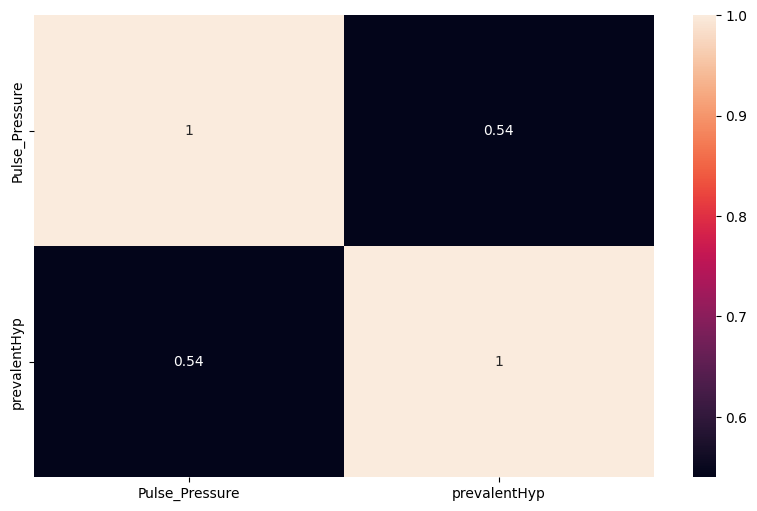

In [1740]:
sns.heatmap(dataset[['Pulse_Pressure','prevalentHyp']].corr(),annot=True)
plt.show()

In [1758]:
# Perform Statistical Test to obtain P-Value
statistic_val,p_value = pearsonr(dataset['Pulse_Pressure'],dataset['prevalentHyp'])
print(round(p_value,209))
if p_value>0.05:
  print('We fail to reject null hypothesis as there is no statistically significant relationship between the independent variable and the dependent variable.')
else:
  print('We reject null hypothesis as as there is significant relationship between the independent variable and the dependent variable.')

3.999999999999999e-209
We reject null hypothesis as as there is significant relationship between the independent variable and the dependent variable.


##### Which statistical test have you done to obtain P-Value?

Pearson's correlation test

##### Why did you choose the specific statistical test?

Because it finds if 2 or more columns are correlated or not 

## ***8. ML Model Implementation***

### ML Model - 1.Logistic Regression

In [1681]:
# ML Model - 1 Implementation
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
# Fit the Algorithm
# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

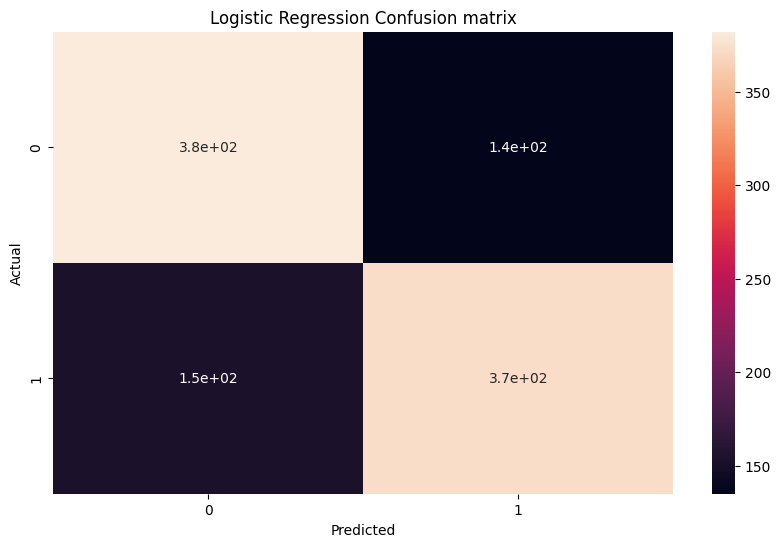

In [1682]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion matrix')
plt.show()

In [1683]:
def em_series(y_train,y_pred,name):
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    specificity= confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0]+confusion_matrix(y_test,y_pred)[0][1])
    series=pd.Series([accuracy,precision,recall,f1,specificity],index=['accuracy','precision','recall','f1','specificity'],name=name)
    return series

In [1684]:
lr_es=em_series(y_train,y_pred,'LR')
lr_es

accuracy       0.723873
precision      0.734252
recall         0.709125
f1             0.721470
specificity    0.738878
Name: LR, dtype: float64

In [1685]:
px.pie(names=lr_es.index,values=lr_es,template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.RdBu,width=500,height=400).update_traces(textinfo='percent + value + label',showlegend=False).update_layout(title_text='Logistic Regression Evaluation Scores',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

#### 2. Cross- Validation & Hyperparameter Tuning

In [1686]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
hyp={'C':np.logspace(-2,2,4),'penalty':['l1','l2','elasticnet',None]}
lr_gscv=GridSearchCV(lr,hyp,cv=5,scoring='f1')
lr_gscv.fit(x_train,y_train)
y_pred=lr_gscv.predict(x_test)
lr_gscv.best_params_

{'C': 0.21544346900318834, 'penalty': 'l2'}

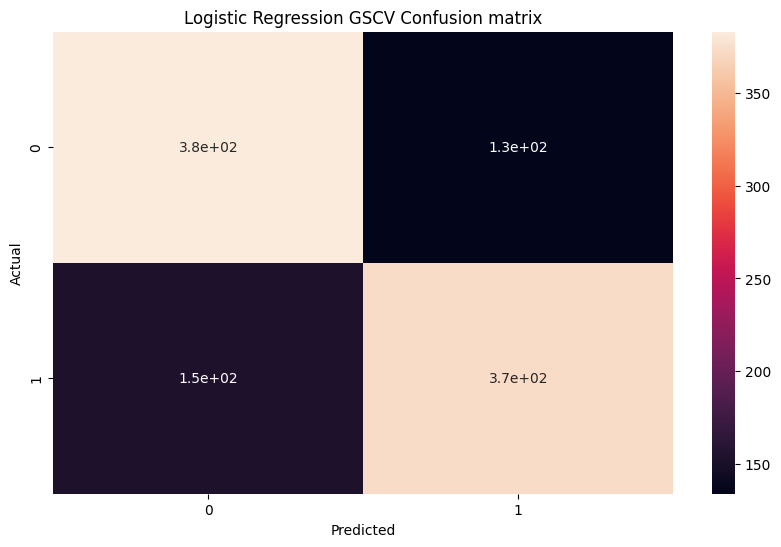

In [1687]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression GSCV Confusion matrix')
plt.show()

In [1688]:
lrgs_es=em_series(y_test,y_pred,'LR GSCV')
lrgs_es

accuracy       0.724832
precision      0.735700
recall         0.709125
f1             0.722168
specificity    0.740812
Name: LR GSCV, dtype: float64

In [1689]:
px.pie(names=lrgs_es.index,values=lrgs_es,template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.Hot,width=500,height=400).update_traces(textinfo='percent + value + label',showlegend=False).update_layout(title_text='Logistic Regression GSCV Evaluation Scores',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [1690]:
lr_em_df=pd.concat([lr_es,lrgs_es],axis=1)
lr_em_df

LR   LR GSCV
accuracy     0.723873  0.724832
precision    0.734252  0.735700
recall       0.709125  0.709125
f1           0.721470  0.722168
specificity  0.738878  0.740812

In [1691]:
px.bar(lr_em_df,barmode='group')

Answer Here.

### ML Model - 2. Decision Trees

In [1692]:
dt=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=50,random_state=2510)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
recall_score(y_test,y_pred)

0.7642585551330798

In [1693]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(dt,x_test,y_test,cv=10,scoring='recall').mean()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

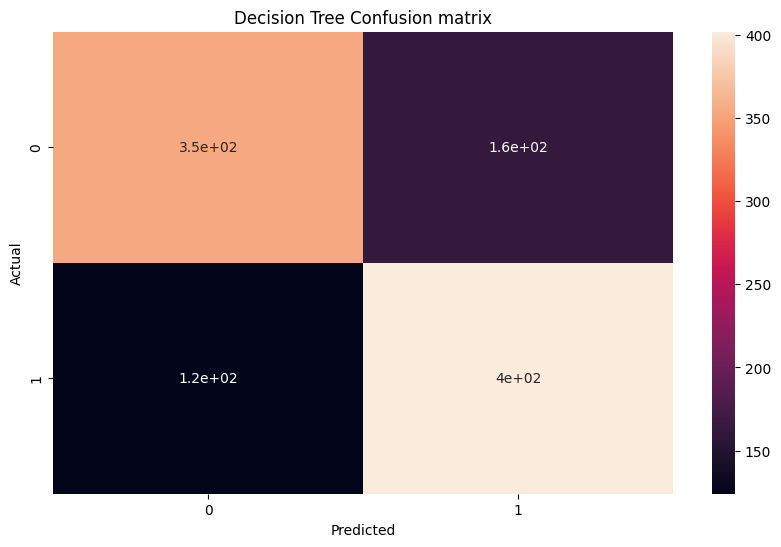

In [1694]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion matrix')
plt.show()

In [1695]:
dt_es=em_series(y_test,y_pred,'DT')
dt_es

accuracy       0.724832
precision      0.711504
recall         0.764259
f1             0.736939
specificity    0.684720
Name: DT, dtype: float64

In [1696]:
px.pie(names=dt_es.index,values=dt_es,template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.Hot,width=500,height=400).update_traces(textinfo='percent + value + label',showlegend=False).update_layout(title_text='Decision Tree Evaluation Scores',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

#### 2. Cross- Validation & Hyperparameter Tuning

In [1697]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
hyp={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[None,10,20,30,40,50,60,70,80,90,100],'min_samples_split':[2,4,6,8,10,12,14,16,18,20],'min_samples_leaf':[1,3,5,7,9,11,13,15,17,19],'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100]}
dt_rscv=RandomizedSearchCV(dt,hyp,cv=5,scoring='recall')
dt_rscv.fit(x_train,y_train)
y_pred=dt_rscv.predict(x_test)
print(recall_score(y_test,y_pred))
dt_rscv.best_params_

0.7699619771863118


{'splitter': 'best',
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 80,
 'max_depth': 80,
 'criterion': 'gini'}

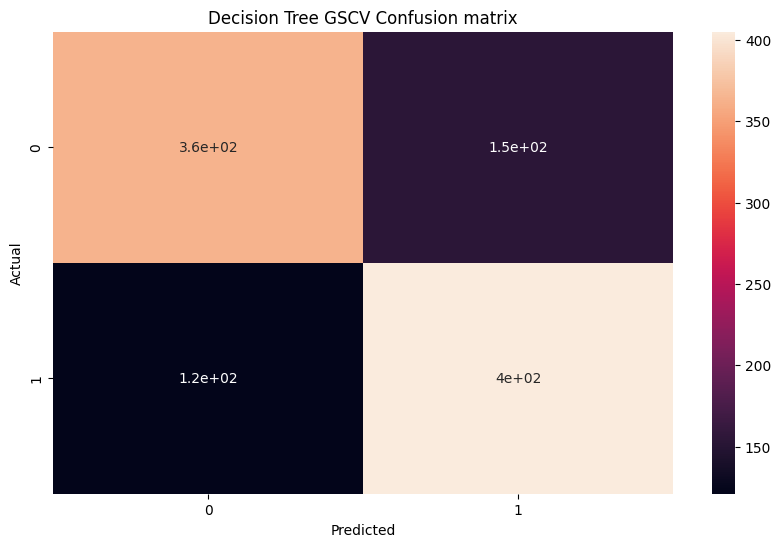

In [1698]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree GSCV Confusion matrix')
plt.show()

In [1699]:
dtgs_es=em_series(y_test,y_pred,'DT GSCV')
dtgs_es

accuracy       0.736337
precision      0.724508
recall         0.769962
f1             0.746544
specificity    0.702128
Name: DT GSCV, dtype: float64

In [1700]:
px.pie(names=dtgs_es.index,values=dtgs_es,template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.Blackbody,width=500,height=400).update_traces(textinfo='percent + value + label',showlegend=False).update_layout(title_text='Decision Tree GSCV Evaluation Scores',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [1701]:
dt_em_df=pd.concat([dt_es,dtgs_es],axis=1)
dt_em_df

DT   DT GSCV
accuracy     0.724832  0.736337
precision    0.711504  0.724508
recall       0.764259  0.769962
f1           0.736939  0.746544
specificity  0.684720  0.702128

In [1702]:
px.bar(dt_em_df,barmode='group')

Answer Here.

### ML Model - 3. Random Forests

In [1703]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
recall_score(y_test,y_pred)

0.8536121673003803

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [1704]:
# Visualizing evaluation Metric Score chart


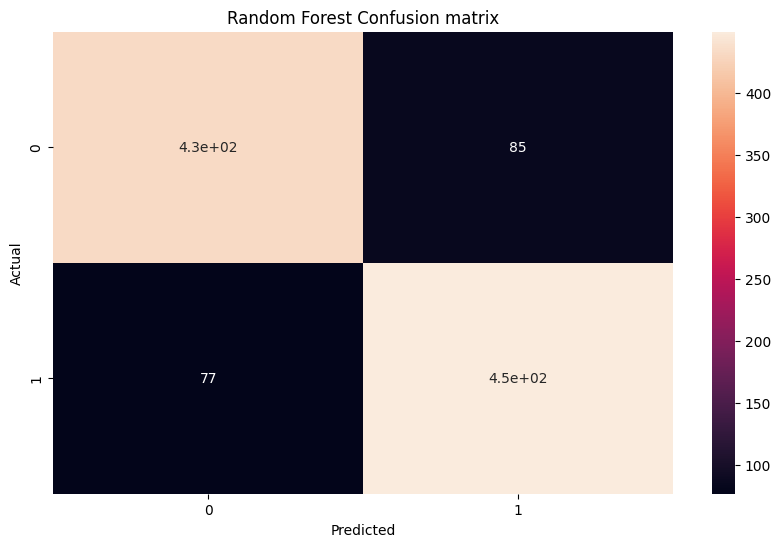

In [1705]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion matrix')
plt.show()

In [1706]:
rf_es=em_series(y_test,y_pred,'RF')
rf_es

accuracy       0.844679
precision      0.840824
recall         0.853612
f1             0.847170
specificity    0.835590
Name: RF, dtype: float64

In [1707]:
px.pie(names=rf_es.index,values=rf_es,template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.Hot,width=500,height=400).update_traces(textinfo='percent + value + label',showlegend=False).update_layout(title_text='Random Forest Evaluation Scores',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

#### 2. Cross- Validation & Hyperparameter Tuning

In [1708]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
hyp={'criterion':['gini','entropy','log_loss'],'n_estimators':[80,90,100,110,120],'max_depth':[None,10,20,30,40,50,60,70,80,90,100],'min_samples_split':[2,4,6,8,10,12,14,16,18,20],'min_samples_leaf':[1,3,5,7,9,11,13,15,17,19],'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100],'bootstrap':[True,False]}
rf_rscv=RandomizedSearchCV(rf,hyp,cv=5,scoring='recall')
rf_rscv.fit(x_train,y_train)
y_pred=rf_rscv.predict(x_test)
print(recall_score(y_test,y_pred))
rf_rscv.best_params_

0.7775665399239544


{'n_estimators': 90,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 90,
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': True}

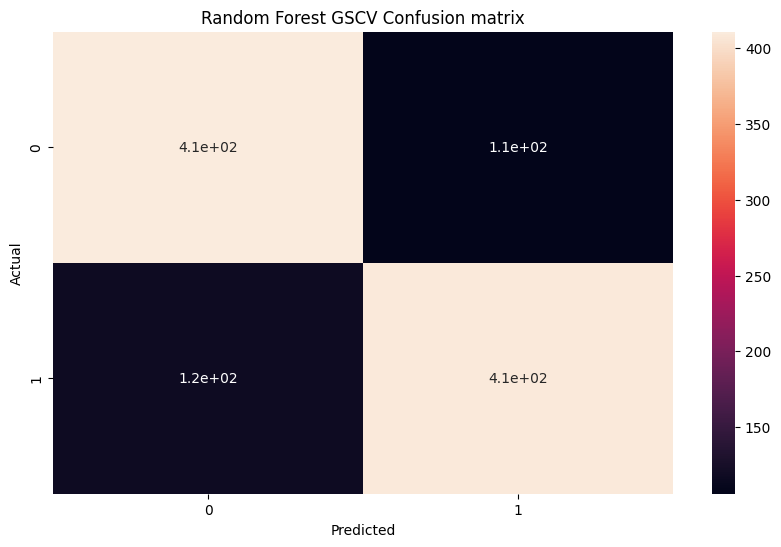

In [1709]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest GSCV Confusion matrix')
plt.show()

In [1710]:
rfgs_es=em_series(y_test,y_pred,'RF GSCV')
rfgs_es

accuracy       0.786194
precision      0.794175
recall         0.777567
f1             0.785783
specificity    0.794971
Name: RF GSCV, dtype: float64

In [1711]:
px.pie(names=rfgs_es.index,values=rfgs_es,template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.Inferno,width=500,height=400).update_traces(textinfo='percent + value + label',showlegend=False).update_layout(title_text='Random Forest GSCV Evaluation Scores',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [1712]:
rf_em_df=pd.concat([rf_es,rfgs_es],axis=1)
rf_em_df

RF   RF GSCV
accuracy     0.844679  0.786194
precision    0.840824  0.794175
recall       0.853612  0.777567
f1           0.847170  0.785783
specificity  0.835590  0.794971

In [1713]:
px.bar(rf_em_df,barmode='group')

Answer Here.

### ML Model - 4. XG Boost

In [1729]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=rf.predict(x_test)
recall_score(y_test,y_pred)

0.8536121673003803

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

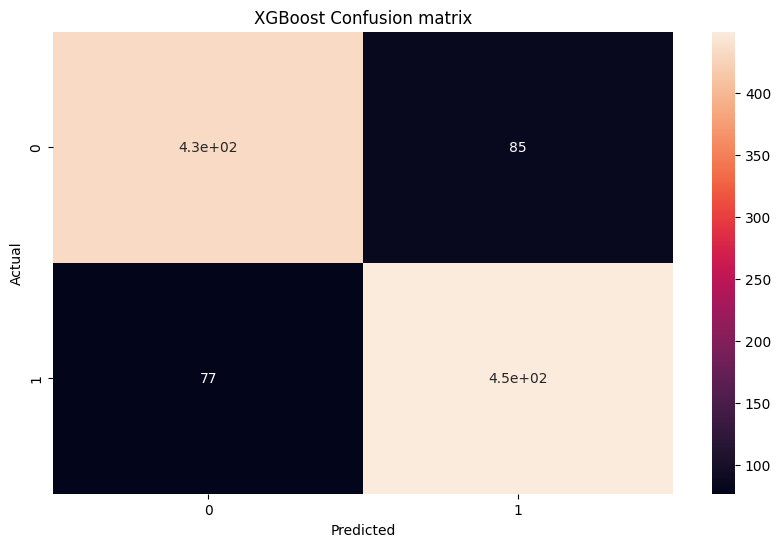

In [1715]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion matrix')
plt.show()

In [1716]:
xgb_es=em_series(y_test,y_pred,'XGB')
rf_es

accuracy       0.844679
precision      0.840824
recall         0.853612
f1             0.847170
specificity    0.835590
Name: RF, dtype: float64

In [1717]:
px.pie(names=xgb_es.index,values=xgb_es,template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.Hot,width=500,height=400).update_traces(textinfo='percent + value + label',showlegend=False).update_layout(title_text='XGBoost Evaluation Scores',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

#### 2. Cross- Validation & Hyperparameter Tuning

In [1728]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
hyp={'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],'max_depth':[None,10,20,30,40,50,60,70,80,90,100],'max_delta_step':list(range(1,11)),'min_split_loss':list(range(0,101,10))}
xgb_rscv=RandomizedSearchCV(xgb,hyp,cv=5,scoring='recall')
xgb_rscv.fit(x_train,y_train)
y_pred=xgb_rscv.predict(x_test)
print(recall_score(y_test,y_pred))
xgb_rscv.best_params_

0.8650190114068441


{'min_split_loss': 0,
 'max_depth': 40,
 'max_delta_step': 8,
 'learning_rate': 0.1}

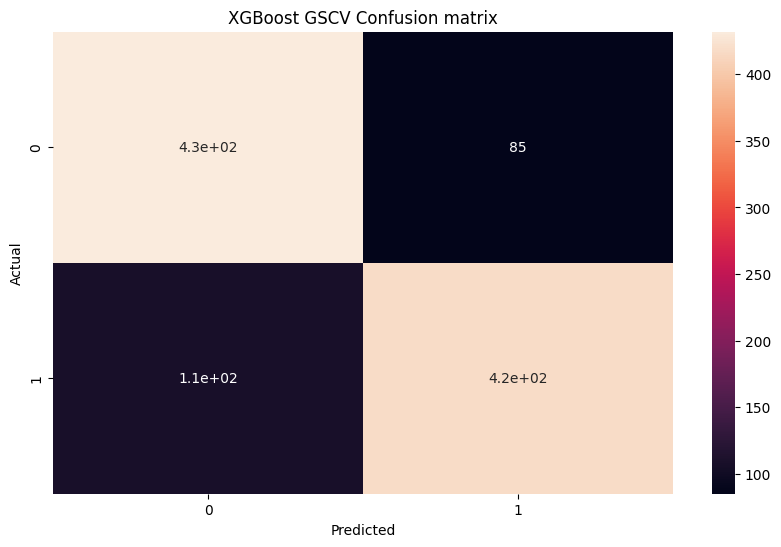

In [1719]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost GSCV Confusion matrix')
plt.show()

In [1720]:
xgbgs_es=em_series(y_test,y_pred,'XGB GSCV')
xgbgs_es

accuracy       0.814957
precision      0.831014
recall         0.794677
f1             0.812439
specificity    0.835590
Name: XGB GSCV, dtype: float64

In [1721]:
px.pie(names=xgbgs_es.index,values=xgbgs_es,template='plotly_dark',hole=0.2,color_discrete_sequence=px.colors.sequential.Inferno,width=500,height=400).update_traces(textinfo='percent + value + label',showlegend=False).update_layout(title_text='XGBoost GSCV Evaluation Scores',title_x=0.5,legend=dict(orientation="h",yanchor="bottom",y=-0.1,xanchor="center",x=0.5))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [1722]:
xgb_em_df=pd.concat([xgb_es,xgbgs_es],axis=1)
xgb_em_df

XGB  XGB GSCV
accuracy     0.844679  0.814957
precision    0.840824  0.831014
recall       0.853612  0.794677
f1           0.847170  0.812439
specificity  0.835590  0.835590

In [1723]:
px.bar(xgb_em_df,barmode='group')

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [1724]:
ml_em_df=pd.concat([lr_em_df,dt_em_df,rf_em_df,xgb_em_df],axis=1)
ml_em_df

LR   LR GSCV        DT   DT GSCV        RF   RF GSCV  \
accuracy     0.723873  0.724832  0.724832  0.736337  0.844679  0.786194   
precision    0.734252  0.735700  0.711504  0.724508  0.840824  0.794175   
recall       0.709125  0.709125  0.764259  0.769962  0.853612  0.777567   
f1           0.721470  0.722168  0.736939  0.746544  0.847170  0.785783   
specificity  0.738878  0.740812  0.684720  0.702128  0.835590  0.794971   

                  XGB  XGB GSCV  
accuracy     0.844679  0.814957  
precision    0.840824  0.831014  
recall       0.853612  0.794677  
f1           0.847170  0.812439  
specificity  0.835590  0.835590

In [1725]:
def get_max_of_row(df):
    for i in range(df.shape[0]):
        l=list(df.iloc[i])
        ind=l.index(max(l))
        col=df.columns[ind]
        return col

In [1726]:
ml_em_df['Best']=ml_em_df.apply(get_max_of_row(ml_em_df))
ml_em_df

LR   LR GSCV        DT   DT GSCV        RF   RF GSCV  \
accuracy     0.723873  0.724832  0.724832  0.736337  0.844679  0.786194   
precision    0.734252  0.735700  0.711504  0.724508  0.840824  0.794175   
recall       0.709125  0.709125  0.764259  0.769962  0.853612  0.777567   
f1           0.721470  0.722168  0.736939  0.746544  0.847170  0.785783   
specificity  0.738878  0.740812  0.684720  0.702128  0.835590  0.794971   

                  XGB  XGB GSCV      Best  
accuracy     0.844679  0.814957  0.844679  
precision    0.840824  0.831014  0.840824  
recall       0.853612  0.794677  0.853612  
f1           0.847170  0.812439  0.847170  
specificity  0.835590  0.835590  0.835590

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [1730]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1731]:
import shap

In [1732]:
# Initializing JavaScript visualizations in notebook environment
shap.initjs()
# Defining a tree explainer for the built model
explainer = shap.TreeExplainer(rf)
# obtaining shap values for the first row of the test data
shap_values = explainer.shap_values(x_tl.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0],x_tl.iloc[0])

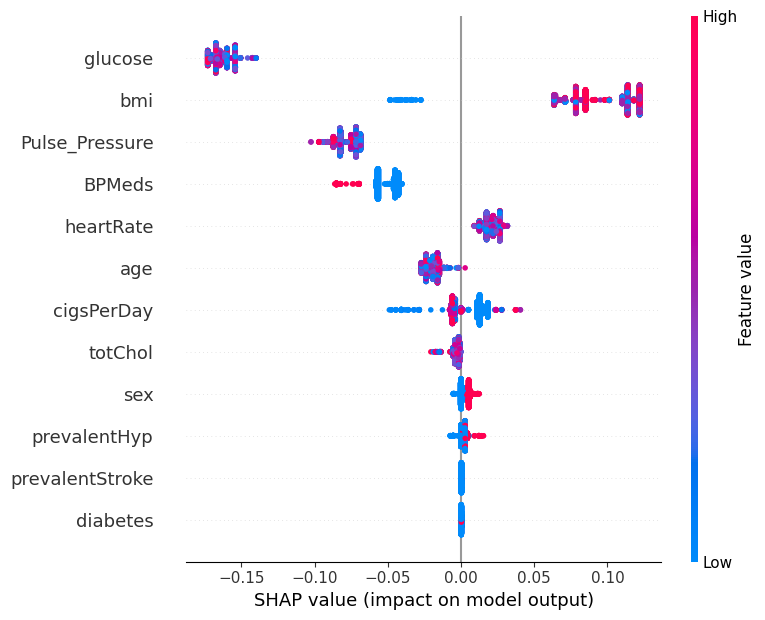

In [1733]:
shap_values = shap.TreeExplainer(rf).shap_values(x_tl)
shap.summary_plot(shap_values[0], x_tl)

Answer Here.

# **Conclusion**

Write the conclusion here.